In [32]:
import pandas as pd
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

# Tokenization

In [7]:
wisdom = "To be or not to be, once said a bee. The bee wanted to be, but she remained just a bee"

In [8]:
print(wisdom)

To be or not to be, once said a bee. The bee wanted to be, but she remained just a bee


In [9]:
wisdom.split()

['To',
 'be',
 'or',
 'not',
 'to',
 'be,',
 'once',
 'said',
 'a',
 'bee.',
 'The',
 'bee',
 'wanted',
 'to',
 'be,',
 'but',
 'she',
 'remained',
 'just',
 'a',
 'bee']

In [12]:
nltk.sent_tokenize(wisdom)

['To be or not to be, once said a bee.',
 'The bee wanted to be, but she remained just a bee']

In [16]:
nltk.word_tokenize(wisdom)

['To',
 'be',
 'or',
 'not',
 'to',
 'be',
 ',',
 'once',
 'said',
 'a',
 'bee',
 '.',
 'The',
 'bee',
 'wanted',
 'to',
 'be',
 ',',
 'but',
 'she',
 'remained',
 'just',
 'a',
 'bee']

# Stop words

In [24]:
from nltk.corpus import stopwords

In [25]:
english = stopwords.words('english')

In [26]:
words = nltk.word_tokenize(wisdom)

In [30]:
[word for word in words if word.lower() not in english]

[',', 'said', 'bee', '.', 'bee', 'wanted', ',', 'remained', 'bee']

In [11]:
[word for word in words if word.lower() not in english]

[',', 'said', 'bee', '.', 'bee', 'wanted', ',', 'remained', 'bee']

# Use the same technique to create a better summary for the first  earning call

In [33]:
data = pd.read_csv('../data/EC2000.csv.gz')

1- drop first column index, rename fName to company, drop the last three columns

In [34]:
data2 = data.drop('index', axis='columns')

In [35]:
data3 = data2.rename({'fName':'company'}, axis='columns')

In [36]:
last_three_cols = data3.columns[-3:]

In [37]:
data4 = data3.drop(last_three_cols, axis='columns')

In [38]:
data4.head()

,id,text,date,company,sector
0,32934,"Zoe's Kitchen, Inc. (NYSE:ZOES)\nQ2 2015 Earni...",2015-08-28 00:11:00,"Zoe's Kitchen, Inc.",Consumer Services
1,32905,"Autodesk, Inc. (NASDAQ:ADSK)\nQ2 2016 Earnings...",2015-08-28 00:07:00,"Autodesk, Inc.",Technology
2,32926,Smith & Wesson Holding Corp. (NASDAQ:SWHC)\nQ1...,2015-08-27 23:25:00,Smith & Wesson Holding Corporation,Capital Goods
3,32930,"Ulta Salon, Cosmetics & Fragrance, Inc. (NASDA...",2015-08-27 23:09:00,"Ulta Salon, Cosmetics & Fragrance, Inc.",Consumer Services
4,32907,Splunk Inc. (NASDAQ:SPLK)\nQ2 2016 Earnings Co...,2015-08-27 22:56:00,Splunk Inc.,Technology


In [39]:
text1 = data4.iloc[0].text

In [41]:
words = nltk.word_tokenize(text1)

In [46]:
filtered_words = [word.capitalize() for word in words if word.lower() not in english and len(word) > 1]

In [48]:
sw = pd.Series(filtered_words).value_counts()

(-0.5, 399.5, 199.5, -0.5)

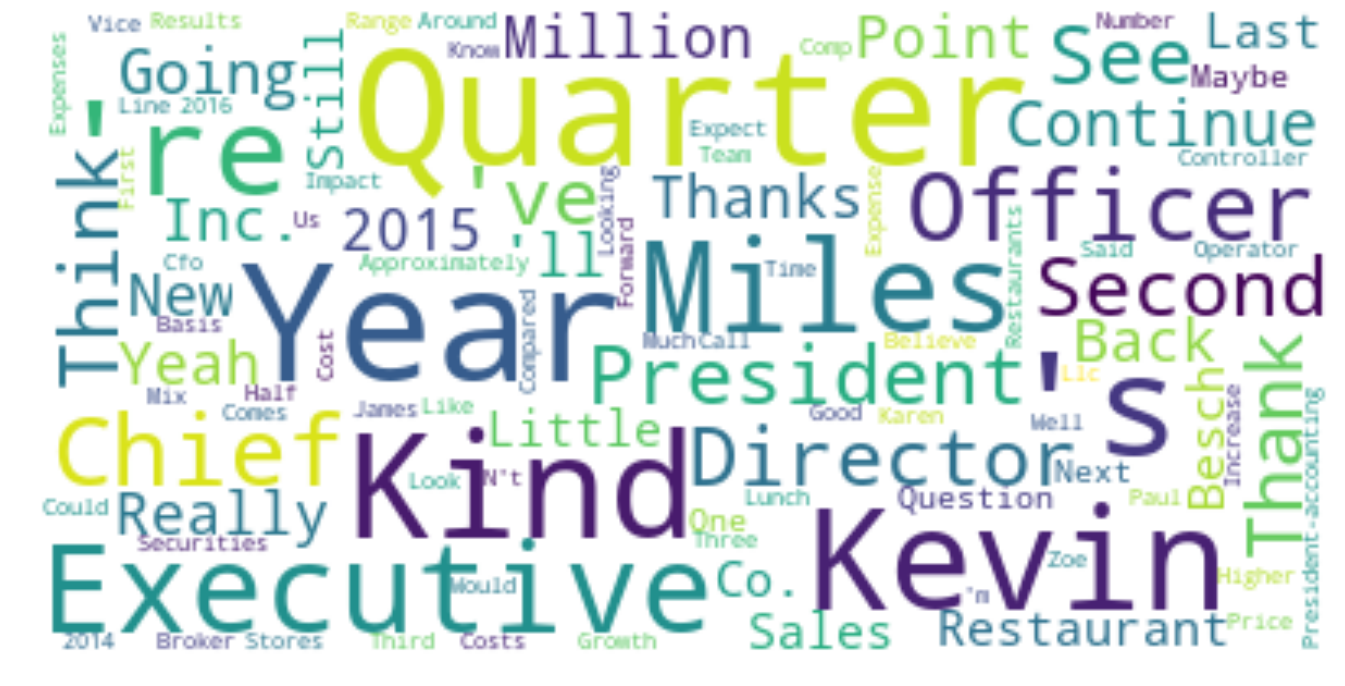

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wc=WordCloud(max_font_size=50, max_words=100, background_color="white")
wc.generate_from_frequencies(sw)
plt.figure(figsize=(25,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')